# Using Biopython

![alt text](http://biopython.org/assets/images/biopython_logo_s.png "Logo Title Text 1")

The first step after extracting the FASTA/FASTQ files from MinION data is performing the QC. There are several options for filtering or visualization. [BioPython](biopython.org/) is a module that provides tools for biological computation. Processing our data using Python and this module allows greater control when filtering or visualizing our data.

In this notebook we will combine Biopython with other data science modules like pandas or matplotlib to improve our ability to analyze the MinION data.

The first step is to build a pandas dataframe of our reads and its features.
  

In [1]:
#Biopython module imports for loading sequence files
from Bio import SeqIO
from Bio.SeqUtils import GC

#Numpy and pandas to manage our data
import numpy as np
import pandas as pd

#We will use reagular expressions for extract the read id
import re

In [2]:
#Function to build a pandas dataframe from a FASTA or FASTQ file
def read_sequence_file(filename, format):
    rows = []
    columns = ['id', 'sequence', 'read_length', 'gc_content']
    if(format == 'fastq'):
        columns.append('avg_quality')
    #Building each row with the read and its features
    for seq_record in SeqIO.parse(filename, format):
        if(format == 'fastq'):
            quality_score = np.mean(seq_record.letter_annotations["phred_quality"])
        read_id = re.search('(^.+?)\s', seq_record.description).group(1)
        if(format == 'fastq'):
            rows.append([read_id, seq_record.seq, len(seq_record.seq), GC(seq_record.seq), quality_score])
        else:
            rows.append([read_id, seq_record.seq, len(seq_record.seq), GC(seq_record.seq)])  
        
    df = pd.DataFrame(rows, columns=columns)
    return df
        
seq_df = read_sequence_file('data/agalactiae/merged-output.fasta', 'fasta')

We have used Biopython built-in functions to extract information of DNA sequences and now we have a dataframe with all the important features. Since we have our data organized as a pandas dataframe, we can generate visualizations using matplotlib:

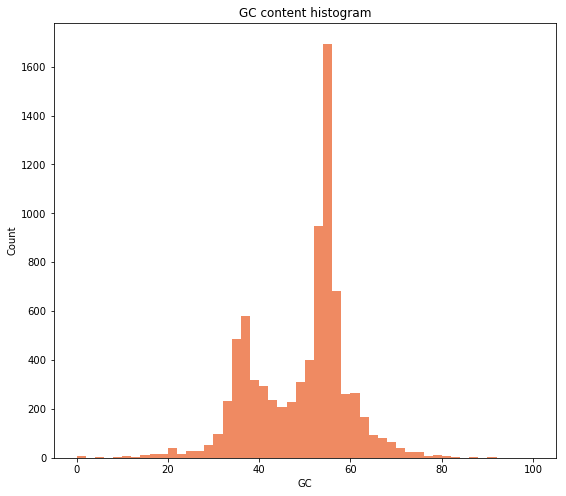

In [3]:
#Using matplotlib to generate GC content histogram
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib
#Setting the plot size
matplotlib.rcParams['figure.figsize'] = (9, 8)

#Building histogram with the gc content column of the dataframe
plt.hist(seq_df['gc_content'], bins=50, color='#ef8a62')
plt.title('GC content histogram')
plt.xlabel('GC')
plt.ylabel('Count')
plt.show()

The main advantage of using matplotlib to visualize the data is the capability of customize our plots:

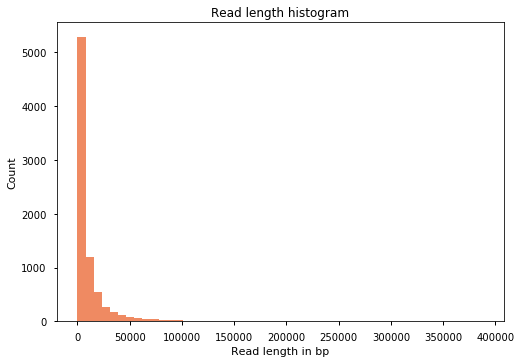

In [4]:
#We can customize the plot using the pre-defined style called “ggplot” to emulate ggplot (popular R vizualization package) style 
plt.style.use('seaborn-notebook')

#On the plt.hist parameters we can set the number of bins and the bar color using labels as 'blue', 'red', 'yellow'... or using a RGB code.
plt.hist(seq_df['read_length'], bins=50, color='#ef8a62')
plt.title('Read length histogram')
plt.xlabel('Read length in bp')
plt.ylabel('Count')

plt.show()

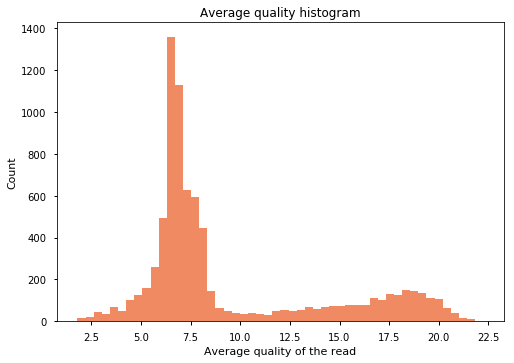

In [5]:
#Only works if input file is in FASTQ format
plt.hist(seq_df['avg_quality'], bins=50, color='#ef8a62')
plt.title('Average quality histogram')
plt.xlabel('Average quality of the read')
plt.ylabel('Count')

plt.show()

Pandas also allows us to create subsets of our data to get statistics or plot a read length histogram of a subset of reads with a GC content within a given range:

In [6]:
first_range_df = seq_df[(seq_df['gc_content'] > 30) & (seq_df['gc_content'] < 50)]
second_range_df = seq_df[(seq_df['gc_content'] > 55) & (seq_df['gc_content'] < 80)]

seq_df.describe()

,read_length,gc_content,avg_quality
count,8006.000000,8006.000000,8006.000000
mean,12012.589308,49.261769,9.407477
std,27559.482411,10.611211,4.723721
min,5.000000,0.000000,1.800000
25%,934.250000,40.187881,6.520624
50%,3852.000000,53.203836,7.189041
75%,11589.750000,55.608322,11.845827
max,388351.000000,100.000000,22.241614


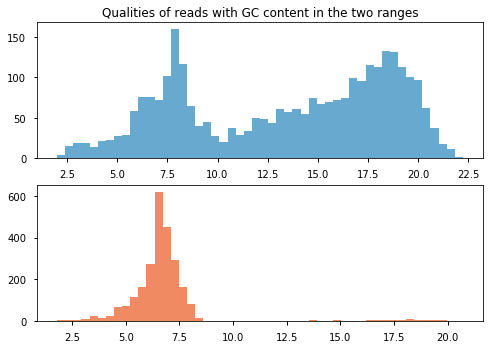

In [7]:
#Only works if input file is in FASTQ format
f, axarr = plt.subplots(2)

axarr[0].hist(first_range_df['avg_quality'], bins=50, color='#67a9cf')
axarr[0].set_title('Qualities of reads with GC content in the two ranges')

axarr[1].hist(second_range_df['avg_quality'], bins=50, color='#ef8a62')


plt.show()

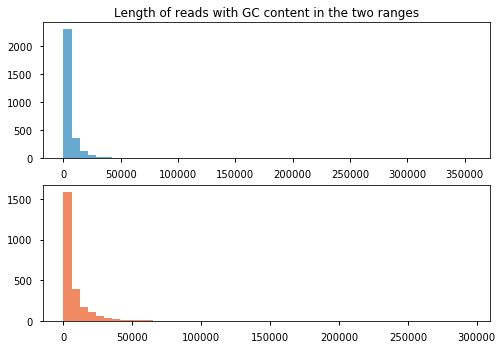

In [8]:
f, axarr = plt.subplots(2)

axarr[0].hist(first_range_df['read_length'], bins=50, color='#67a9cf')
axarr[0].set_title('Length of reads with GC content in the two ranges')

axarr[1].hist(second_range_df['read_length'], bins=50, color='#ef8a62')


plt.show()